# Neurodynamics - Homework 03: FitzHugh-Nagumo

Group: Katarzyna Olszynska (1000023) & Benjamin Peters (982981)

## Imports

In [ ]:
!pip install brian2

In [ ]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

## Question 1

We are analysing the FitzHugh-Nagumo model in the following form in brian2:

$\dot{V} = V − \frac{V^{3}}{3} − w + I \\
\dot{w} = \Phi (V + a − bw)$

with parameters: a = 1.0, b = 0.5, $\Phi$ = 0.1. Notice, that this model is dimensionless, i.e. we don’t identify the individual variables with physical quantities and units (t in brian is not dimensionless by default in brian2, so your implementation will have to take this into account as part
of your equation).

First, find the nullclines for *V* and *w* in the system analytically.

**Solution:**

**Nullcline for *V***

$\dot{V} = 0 \\ \Leftrightarrow V − \frac{V^{3}}{3} − w + I = 0 \\ \Leftrightarrow w = V - \frac{V^{3}}{3} + I$

**Nullcline for *w***

$\dot{w} = 0 \\ \Leftrightarrow \Phi (V + a − bw) = 0 \\ \Leftrightarrow w = (V + a)/b$

In [ ]:
# define nullcline functions using the given parameter values
v_nullcline = lambda V, I: V - (V**3) / 3 + I
w_nullcline = lambda V: (V + 1) / 0.5
# create a range for V that we want to plot
v_range = np.linspace(-3, 3, 100)
# calculate nullclines
v_nc0 = [v_nullcline(V, 0) for V in v_range]
v_nc2 = [v_nullcline(V, 2) for V in v_range]
w_nc = [w_nullcline(V) for V in v_range]

Use them to draw a phase portrait of the system for *I* = 0 and *I* = 2 by drawing the nullclines and indicating the system dynamics via its corresponding vector field (For a dynamical system $\dot{x} = f(x, y)$ and $\dot{y} = g(x, y)$, this vector field is the collection of tangent vectors ($f(x, y), g(x, y)$)
for different states of the system $(x, y)$ which are also the offset of the vectors from the origin.). You can get a particularly clean picture by drawing the tangent vectors with origins on the nullclines, alternatively you can draw a mesh of vectors evenly spaced. A good range of values to plot is between -3 and 3 for both *V* and *w*.

In [ ]:
# lambda functions to calculate derivatives of V(t) and w(t)
dV = lambda V, w, I: V - V**3/3 - w + I
dw = lambda V, w: 0.1 * (V + 1.0 - 0.5*w)
# create a mesh of evenly spaced vectors
xy = np.linspace(-3, 3, 20)
v_vals, w_vals = np.meshgrid(xy, xy)
# calculate the vector field for V and w when I = 0 or I = 2
dV0 = dV(V=v_vals, w=w_vals, I=0)
dV2 = dV(V=v_vals, w=w_vals, I=2)
dw = dw(V=v_vals, w=w_vals)

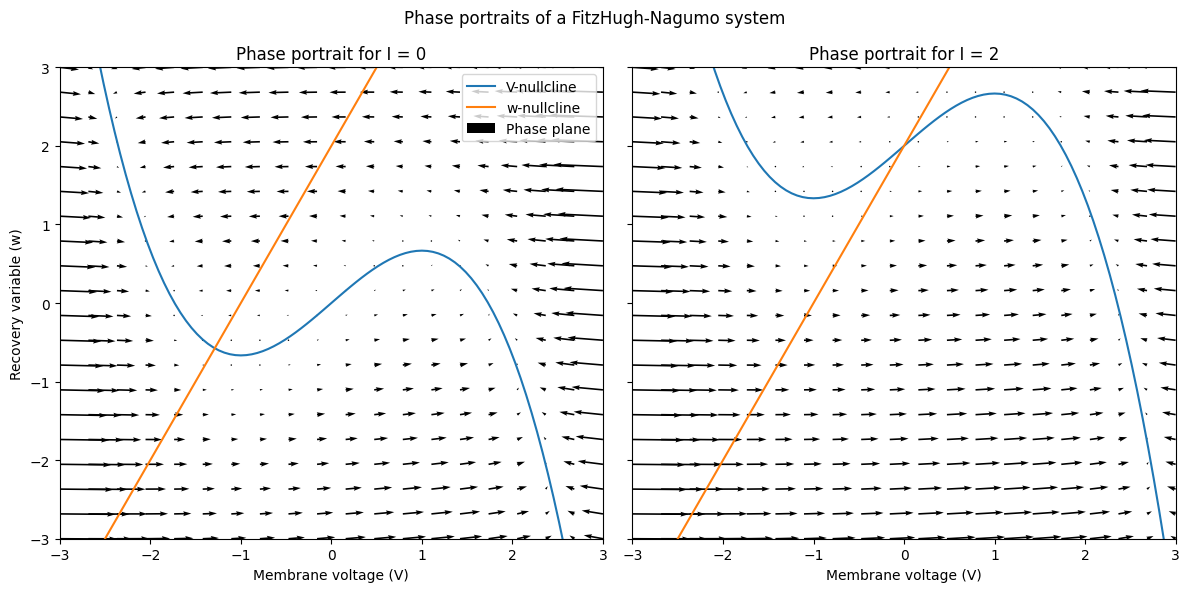

In [ ]:
# plot phase portraits side-by-side
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
# first plot the nullclines when I = 2
axes[0].plot(v_range, v_nc0, label="V-nullcline")
axes[0].plot(v_range, w_nc, label="w-nullcline")
# plot the phase plane on top
axes[0].quiver(v_vals, w_vals, dV0, dw, label="Phase plane")
axes[0].set(title="Phase portrait for I = 0", xlabel="Membrane voltage (V)", ylabel="Recovery variable (w)", xlim=[-3,3], ylim=[-3,3])
axes[0].legend(loc="upper right")
# repeat procedure for I = 2
axes[1].plot(v_range, v_nc2, label="V-nullcline")
axes[1].plot(v_range, w_nc, label="w-nullcline")
axes[1].quiver(v_vals, w_vals, dV2, dw)
axes[1].set(title="Phase portrait for I = 2", xlabel="Membrane voltage (V)", xlim=[-3,3], ylim=[-3,3])

fig.suptitle("Phase portraits of a FitzHugh-Nagumo system")

fig.tight_layout()

plt.show()

Can you get an intuition about the system dynamics already? Where are fixed points, how would trajectories evolve in phase space?

**Answer:** The resulting phase portraits show the intersections of the nullclines for $V$ and $w$ as well as the direction and magnitude of the vector field at different points in the $V$-$w$ space. By examining the nullclines and the vector field, one can gain intuition about the system's dynamics, such as the locations of fixed points and the trajectories that the system would follow in phase space.

To identify the fixed points, we need to find the values of V and w at which both derivatives, $dV/dt$ and $dw/dt$, are equal to zero simultaneously. In other words, we are looking for the points where the vector field is zero.

From the given equations:

$dV/dt = V - V^3/3 - w + I = 0$

$dw/dt = 0.1 * (V + 1 - 0.5w) = 0$

For the first equation, we can rearrange it as follows:

$V^3/3 - V + w = I \\ \Leftrightarrow w = V - \frac{V^{3}}{3} + I$

This equation represents a curve in the $V$-$w$ space. The fixed points are the points on this curve where $dw/dt$ is also equal to zero:

$V + 1 - 0.5w = 0 \\ \Leftrightarrow w = 2V + 2$

Therefore, the fixed points occur when the curve $w = V - \frac{V^{3}}{3} + I$ intersects the line $w = 2V + 2$.

Overall, both phase portraits show a circular flow. To analyze the trajectories in phase space, we will consider both scenarios:

For $I = 0$:

In this case, the nullcline for $V$ ($V$-nullcline) is a cubic curve given by $V^3/3 - V = 0$, and the nullcline for $w$ ($w$-nullcline) is a line given by $w = 2V + 2$. The fixed point occurs at the intersection of these two functions $(-1,29|-0.58)$, which represents a focus point. The vector field shows the direction and magnitude of the derivatives of V and w at different points. Trajectories in phase space would follow the vector field, indicating the direction in which V and w evolve over time.

For $I = 2$:

In this case, the $V$-nullcline shifts upward by 2 units because of the external input current $I$. The fixed point shifts accordingly to $(0|2)$. The vector field will also change its shape and direction based on the new nullcline positions. Trajectories in phase space would exhibit different behavior compared to the $I = 0$ case.

By examining the phase portraits in the given code, we can visualize the fixed points as the intersections of the nullclines and observe how the trajectories evolve in phase space by following the direction of the vector field.

## Question 2

Next, solve the system for *I* = 0 and *I* = 2 with starting value (*V* = −2, *w* = 0.4) by
implementing the FitzHugh-Nagumo model in brian2.

In [ ]:
def simulate_fitzhugh_nagumo(time_span, input_current):
  """
  This function describes the simulation of neural behaviour according to the FitzHugh-Nagumo model.

  Parameters:
  time_span -- denotes the length of the simulation
  input_current -- the current that will be applied to the model neuron

  Returns:
  statemon -- a StateMonitor object tracking the behaviour of V(t) and w(t)
  """
  start_scope()

  # set model parameters
  a = 1.0
  b = 0.5
  phi = 0.1
  I = input_current

  # define the differential equations for the FitzHugh-Nagumo model
  eqs = """
  dV/dt = 1/ms * (V - (V**3)/3 - w + I) : 1
  dw/dt = phi/ms * (V + a - b*w) : 1
  """

  # create a NeuronGroup with respective starting values
  neuron = NeuronGroup(1, model=eqs, method="euler")
  neuron.V = -2.0
  neuron.w = 0.4

  # set up a StateMonitor to track the trajectories of V(t) and w(t)
  statemon = StateMonitor(neuron, ["V", "w"], record=True)

  # create a Network object to manage the simulation
  net = Network(neuron, statemon)
  # run a simulation for given duration
  net.run(time_span)

  return statemon

In [ ]:
# the experiment will run for 100 ms
duration = 100*ms

# run the model simulation for I = 0 and I = 2
exp1 = [simulate_fitzhugh_nagumo(duration, current) for current in [0.0, 2.0]]

Plot the evolution of
the system state as a function of time.

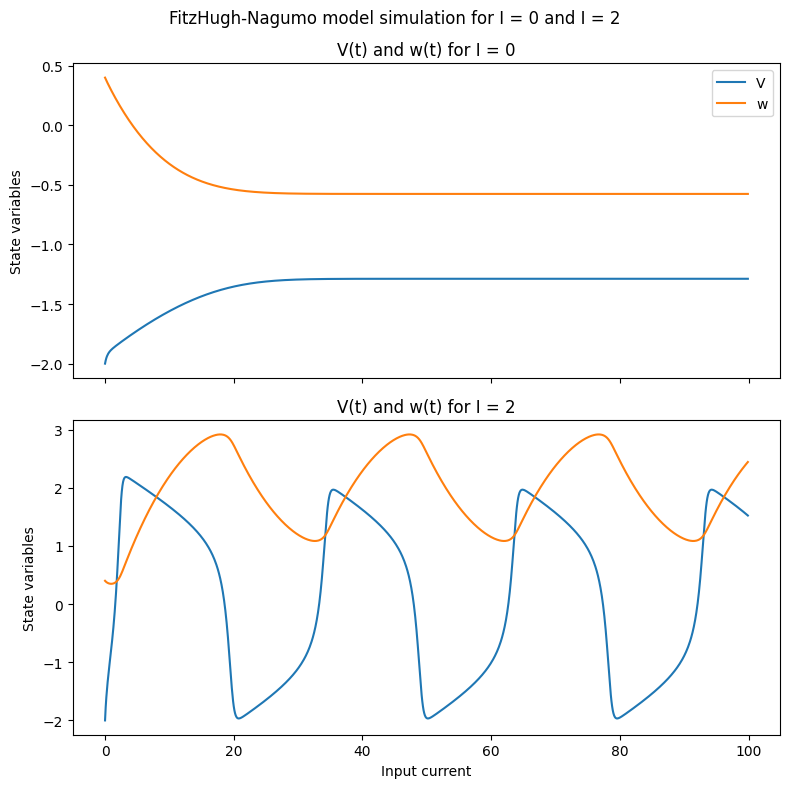

In [ ]:
#plot the results
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(8, 8))

# plot trajectories of V(t) and w(t) for I = 0
axes[0].plot(exp1[0].t/ms, exp1[0].V[0], label="V")
axes[0].plot(exp1[0].t/ms, exp1[0].w[0], label="w")
axes[0].set(ylabel="State variables", title="V(t) and w(t) for I = 0")
axes[0].legend(loc="upper right")
# plot trajectories of V(t) and w(t) for I = 2
axes[1].plot(exp1[1].t/ms, exp1[1].V[0], label="V")
axes[1].plot(exp1[1].t/ms, exp1[1].w[0], label="w")
axes[1].set(xlabel="Input current", ylabel="State variables", title="V(t) and w(t) for I = 2")

# give the plot a proper title
fig.suptitle("FitzHugh-Nagumo model simulation for I = 0 and I = 2")

fig.tight_layout()

plt.show()

Plot the trajectories *V(t)*, *w(t)* for both cases as
part of the phase portraits you drew in the previous question.

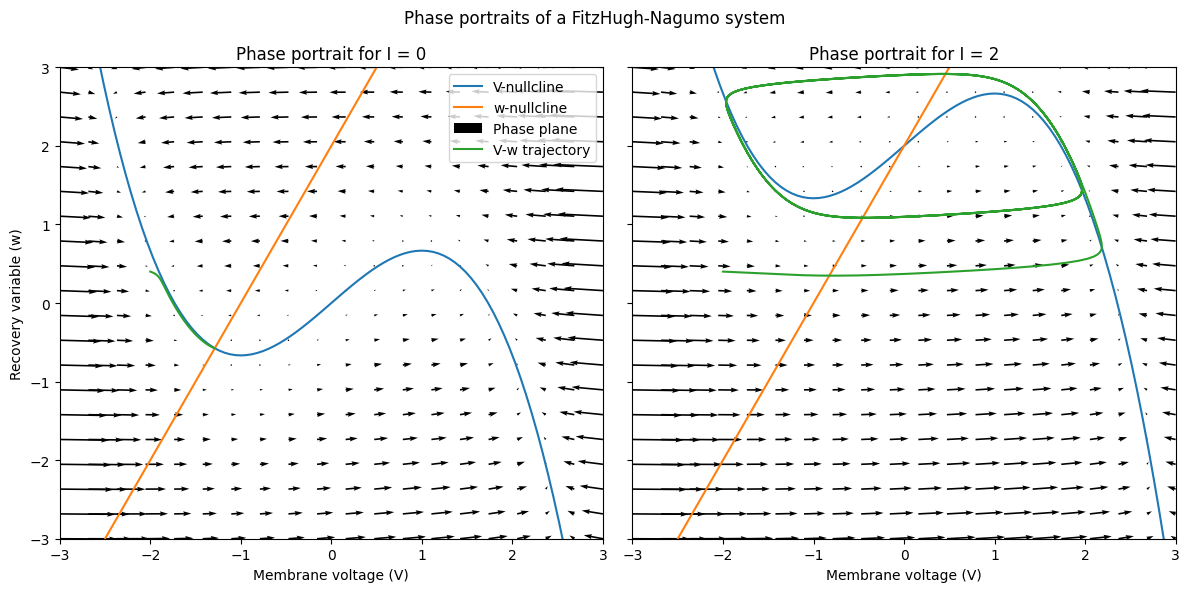

In [ ]:
# plot trajectories of V(t) and w(t) on top of the phase portraits
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12,6))

# case 1: I = 0
axes[0].plot(v_range, v_nc0, label="V-nullcline")
axes[0].plot(v_range, w_nc, label="w-nullcline")
axes[0].quiver(v_vals, w_vals, dV0, dw, label="Phase plane")
# add trajectory of V(t) and w(t)
axes[0].plot(exp1[0].V[0], exp1[0].w[0], label="V-w trajectory")
axes[0].set(title="Phase portrait for I = 0", xlabel="Membrane voltage (V)", ylabel="Recovery variable (w)", xlim=[-3,3], ylim=[-3,3])
axes[0].legend(loc="upper right")

# case 2: I = 2
axes[1].plot(v_range, v_nc2, label="V-nullcline")
axes[1].plot(v_range, w_nc, label="w-nullcline")
axes[1].quiver(v_vals, w_vals, dV2, dw)
axes[1].plot(exp1[1].V[0], exp1[1].w[0])
axes[1].set(title="Phase portrait for I = 2", xlabel="Membrane voltage (V)", xlim=[-3,3], ylim=[-3,3])

fig.suptitle("Phase portraits of a FitzHugh-Nagumo system")

fig.tight_layout()

plt.show()

Describe the dynamics and compare to your predictions from the
previous question.

**Answer:** Based on the simulations and the previous phase portraits, we can describe the dynamics and compare them to the predictions:

For $I = 0$:

The trajectories of $V(t)$ and $w(t)$ for $I = 0$ are plotted in the top row of the figure. As predicted, the system converges to a fixed point, which is evident from the constant values of $V$ and $w$ over time. The fixed point corresponds to the intersection of the $V$-nullcline and the $w$-nullcline in the phase portrait. The trajectories align with the vector field, indicating that the system follows the direction of the vector field and reaches a stable equilibrium.

For $I = 2$:

The trajectories of $V(t)$ and $w(t)$ for $I = 2$ are plotted in the bottom row of the first figure. As predicted, the system exhibits oscillatory behavior, indicating repeated spiking. The trajectories no longer converge to a fixed point but instead form limit cycles. This can be observed from the periodic variations in both $V(t)$ and $w(t)$ over time. The limit cycles are in accordance with the phase portrait, where the trajectories encircle the stable limit cycle region.

The dynamics observed in the simulations align with the predictions made based on the phase portraits. For $I = 0$, the system reaches a stable equilibrium at the fixed point, while for $I = 2$, the system exhibits oscillations in the form of limit cycles. These results demonstrate the characteristic behaviors of the FitzHugh-Nagumo model and validate the understanding of the system dynamics based on the phase portraits.

## Question 3

Lastly, and similar to the last homework, plot the f-I curve of the model for *I* values in the
range of 0.0 to 2.0. In this case, you cannot simply rely on the number of threshold detections. Instead,
you will have to choose what to count as a spike in the dynamics and write an algorithm that counts the
number of those. Think number of consecutive values above your threshold in the array of membrane
voltages.

In [ ]:
# simulate for a second this time around
duration2 = 1*second

# initialize array for input currents
input_currents = np.linspace(0, 2, 20)

# run the experiment for 20 varying currents from 0.0 to 2.0
exp2 = [simulate_fitzhugh_nagumo(duration2, current) for current in input_currents]

In [ ]:
def count_spikes(statemon):
  """
  This function counts the number of spikes that are emitted by a FitzHugh-Nagumo model neuron
  by counting the number of high points of the V(t) curve.

  Parameters:
  statemon -- a StateMonitor object tracking the behaviour of V(t)

  Returns:
  spike_counts -- denotes the number of spikes emitted in a model simulation
  """
  # find peaks of V(t) curve with height of at least 1.0 (a threshold for spikes)
  spikes = find_peaks(statemon.V[0], height=1.0)
  # count the number of spikes
  spike_counts = len(spikes[0])

  return spike_counts

In [ ]:
# extract spike counts from every experiment
spike_counts = [count_spikes(statemon) for statemon in exp2]

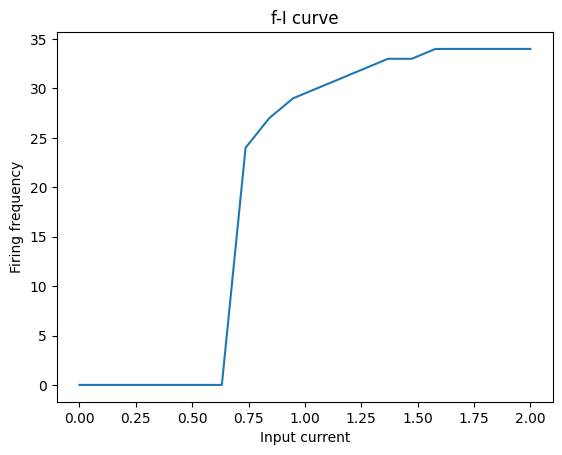

In [ ]:
# plot the results
fig, ax = plt.subplots()

ax.plot(input_currents, spike_counts)
ax.set(title="f-I curve", xlabel="Input current", ylabel="Firing frequency")

plt.show()


Compared to last weeks exercise, is the f-I curve of the FitzHugh-Nagumo model similar or different to the
f-I curve of a leaky-integrate-and-fire model? Characterize one versus the other.

**Answer:** The f-I curve of the FitzHugh-Nagumo model, as plotted in the given code, represents the relationship between the input current ($I$) and the firing frequency (spike counts) of the model neuron. Comparing it to the f-I curve of a leaky integrate-and-fire (LIF) model, we can characterize the similarities and differences as follows:

Similarities:
1. Both models exhibit a positive correlation between the input current and the firing frequency. As the input current increases, the firing frequency generally increases.
2. Both models show a saturation effect. At high input currents, the firing frequency reaches a maximum value, beyond which further increases in input current do not significantly affect the firing frequency.

Differences:
1. Shape: The shape of the f-I curve in the FitzHugh-Nagumo model is typically nonlinear and can exhibit complex dynamics such as oscillations and bistability. On the other hand, the f-I curve of a simple leaky integrate-and-fire model is typically a monotonically increasing function.
2. Bifurcations: The FitzHugh-Nagumo model can exhibit bifurcations, such as the saddle-node bifurcation and the Hopf bifurcation, which can give rise to the emergence of limit cycles and other nonlinear behaviors. In contrast, the LIF model does not exhibit such bifurcations and is simpler in terms of its dynamics.
3. Spike Shape: The FitzHugh-Nagumo model produces action potentials with complex waveform shapes, including depolarization and repolarization phases. In contrast, the LIF model generates simple, stereotypical spikes with a rapid depolarization phase followed by a hyperpolarization phase.

In summary, the f-I curve of the FitzHugh-Nagumo model and the f-I curve of a leaky integrate-and-fire model share similarities in terms of the positive correlation between input current and firing frequency. However, the FitzHugh-Nagumo model exhibits more complex dynamics, including nonlinear behavior, bifurcations, and complex spike waveforms, making it a more detailed and realistic model of neuronal dynamics compared to the simpler leaky integrate-and-fire model.